# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly



In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

In this section, we will look at the datasets, searching for missing or duplicated values, as well as understanding the shape of the data and other relevant informations.

In [5]:
# Creating a list with the dataframes object and name to interate through and print relevant informations
list_dfs = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]
list_names = ['df_hh_income', 'df_pct_poverty', 'df_pct_completed_hs', 'df_share_race_city', 'df_fatalities']

# Loop through both the dataframes and their names
for df, name in zip(list_dfs, list_names):
    print(f'{name} has {df.shape[0]} rows and {df.shape[1]} columns.')
    print(f'The column names are: {list(df.columns)}\n')
    print(df.info())

    # Print the count of missing values
    print(f'Missing values:\n{df.isna().sum()}\n')

    # Print the count of duplicated rows
    print(f'Duplicated rows: {df.duplicated().sum()}\n')
    print('-' * 50)  # Separator for readability

df_hh_income has 29322 rows and 3 columns.
The column names are: ['Geographic Area', 'City', 'Median Income']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
None
Missing values:
Geographic Area     0
City                0
Median Income      51
dtype: int64

Duplicated rows: 0

--------------------------------------------------
df_pct_poverty has 29329 rows and 3 columns.
The column names are: ['Geographic Area', 'City', 'poverty_rate']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-

* There are no duplicated rows in the datasets;
* Missing values for the datasets 'df_hh_income' and 'df_fatalities';
* Numeric fields and Date fields, as 'Median Income' or 'date', are currently as object type. Since some of then does not show missing values, probably pandas assign the type 'object' due to the presence of some string to represent missing value, as 'MISS', 'NAN', 'NOT PRESENT', etc;
* Some columns contain the same information in different datasets, but the column name is different (e.g. 'Geographic Area')




# Data Cleaning and Pre-Processing

In this section, we will focus on treating the datasets by dealing with missing values and non-numeric values (when needed), as well as applying any relevant transformation to the dataset (e.g. data type transformations).

### Income Dataset (df_hh_income)

In [6]:
# Check the datatype for the first dataframe with NA values
df_hh_income.info()

# Creating a copy of the dataframe to preserve the original
df_hh_income_clean = df_hh_income

# Converting the 'Median Income' to numeric values and replacing no-numeric value with NA
df_hh_income_clean['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')

# Check for new missing values after the numeric transformation
df_hh_income.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


,0
Geographic Area,0
City,0
Median Income,1937


Since there was non-numeric values presents in the 'Median Income' field, the number of missing values has increased from 51 to 1608.

The proposed solution for the Income dataset is to replace the missing values with the mean for each Geographic Area.

In [7]:
# replacing the missing values from each city by the geographic area median
df_hh_income_clean['Median Income'] = df_hh_income_clean.groupby(['Geographic Area'])['Median Income'].transform(lambda x: x.fillna(x.mean()))

# Checking the results
df_hh_income_clean.isna().sum()

,0
Geographic Area,0
City,0
Median Income,0


### Poverty Rate Dataset (df_pct_poverty)

In [8]:
# Check the datatype for the first dataframe with NA values
df_pct_poverty.info()

# Creating a copy of the dataframe to preserve the original
df_pct_poverty_clean = df_pct_poverty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


The 'poverty_rate' is a numeric field and must be converted from object to numeric.

In [9]:
# Unique values
df_pct_poverty_clean['poverty_rate'].unique()

array(['78.8', '29.1', '25.5', '30.7', '42', '11.2', '26.7', '30.4',
       '9.7', '41.3', '27.7', '27.5', '24.5', '13.8', '31.7', '16.7',
       '19.1', '8.6', '37.6', '31.6', '18.8', '22.4', '28.3', '13',
       '24.7', '20.3', '31.8', '24.1', '22.2', '6.8', '15.7', '28.6',
       '7.1', '38.2', '26.3', '30.1', '25.3', '44.9', '8.1', '28.8',
       '39.1', '42.9', '36.7', '0', '30.9', '32.9', '20.5', '12.7',
       '41.2', '0.5', '4', '19.4', '60.3', '47.6', '18.2', '53.7', '20.7',
       '19.2', '17.3', '27.8', '34.7', '33', '22.5', '39.7', '11.5',
       '10.8', '23.8', '32.4', '5.8', '79.4', '31.9', '36.6', '32.2',
       '30', '17.2', '18.9', '7.4', '39.6', '25.8', '25', '25.1', '19.8',
       '4.9', '19.9', '33.6', '38.6', '14.7', '16.9', '6.6', '16.4',
       '29.3', '15', '31.4', '19.5', '21.2', '10', '32.1', '24.8', '20.1',
       '24', '7.9', '23.5', '32.8', '12.8', '29.8', '10.7', '11.7',
       '18.1', '38.1', '21', '21.9', '8.5', '9.3', '3.6', '12.9', '48',
       '5.1', 

By checking the unique values for the 'poverty_rate' field, we see that, despite not having missing values, there are values inputed as 'na'.

In [10]:
# Converting to numeric
df_pct_poverty_clean['poverty_rate'] = pd.to_numeric(df_pct_poverty_clean['poverty_rate'],
                                                    errors='coerce')
# Checking new missing values
df_pct_poverty_clean.isna().sum()

,0
Geographic Area,0
City,0
poverty_rate,201


Like the Income dataset, we will replace the missing values with the mean for their corresponding Geographic Area

In [11]:
# Replacing missing values
df_pct_poverty_clean['poverty_rate'] = df_pct_poverty_clean.groupby('Geographic Area')['poverty_rate'].transform(lambda x: x.fillna(x.mean()))

# Checking the results
df_pct_poverty_clean.isna().sum()

,0
Geographic Area,0
City,0
poverty_rate,0


### Education Dataset (df_pct_completed_hs)

In [12]:
# Check the datatype for the first dataframe with NA values
df_pct_completed_hs.info()

# Creating a copy of the dataframe to preserve the original
df_pct_completed_hs_clean = df_pct_completed_hs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


The 'Percent_completed_hs' is a numeric field and must be converted from object to numeric.

In [13]:
df_pct_completed_hs_clean['percent_completed_hs'].unique()

array(['21.2', '69.1', '78.9', '81.4', '68.6', '89.3', '72.7', '78.1',
       '88.8', '74.3', '48.1', '66.9', '81.1', '85.7', '79.8', '87.6',
       '77.7', '87.5', '71.3', '80.6', '83.5', '77.9', '77.6', '83.4',
       '73.7', '76', '94.3', '71.2', '82.8', '79.9', '81.2', '74.7',
       '72.4', '80.3', '73', '79.1', '58.5', '76.7', '89.1', '87.9', '87',
       '63.8', '86.5', '91.9', '100', '65.4', '81.5', '85.1', '90',
       '73.1', '97.6', '95.6', '76.6', '79', '53.7', '75.1', '73.8',
       '84.5', '74.9', '78.6', '75.9', '65.1', '96.2', '78.7', '83.1',
       '66.2', '77.2', '80.2', '22.8', '77', '87.8', '71', '87.1', '81.6',
       '93.5', '80.9', '78.8', '89.4', '91.2', '82.5', '76.8', '92.2',
       '85.3', '57.8', '74.4', '63.1', '88.2', '90.9', '78', '71.7',
       '89.2', '52', '91.3', '84.3', '76.3', '83.9', '79.6', '86', '84.4',
       '70.4', '92.1', '93.4', '83.7', '95.8', '96.3', '82.7', '86.3',
       '64.8', '81.7', '82.3', '86.2', '74.5', '78.5', '90.6', '83.6',
   

By checking the unique values for the 'percent_completed_hs' field, we see that, despite not having missing values, there are values inputed as 'na'.

In [14]:
# Converting to numerical
df_pct_completed_hs_clean['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs_clean['percent_completed_hs'],
                                                                  errors='coerce')
# Checking for new missing values
df_pct_completed_hs_clean.isna().sum()

,0
Geographic Area,0
City,0
percent_completed_hs,197


Like the Income dataset, we will replace the missing values with the mean for their corresponding Geographic Area

In [15]:
# Replacing missing values
df_pct_completed_hs_clean['percent_completed_hs'] = df_pct_completed_hs_clean.groupby('Geographic Area')['percent_completed_hs'].transform(lambda x: x.fillna(x.mean()))

# Checking the results
df_pct_completed_hs_clean.isna().sum()

,0
Geographic Area,0
City,0
percent_completed_hs,0


### Ethnicity Dataset (df_share_race_city)

In [16]:
# Check the datatype for the first dataframe with NA values
df_share_race_city.info()

# Creating a copy of the dataframe to preserve the original
df_share_race_city_clean = df_share_race_city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


The columns containing the share number must be converted to numeric. Also, the name of the column 'Geographic area' is different form the other datasets. Since we will probably have to join then in the future, lets keep the same name for all

In [17]:
# Renaming the column
df_share_race_city_clean.rename({'Geographic area': 'Geographic Area'}, axis=1, inplace=True)

# Checking unique values
df_share_race_city_clean['share_black'].unique()

array(['30.2', '41.4', '44.9', '0.1', '86.5', '13.5', '1.9', '32', '10.2',
       '74.9', '0.6', '1.7', '25.9', '0', '51.5', '3.6', '19.2', '19.5',
       '24.1', '20.3', '17.5', '55.6', '12.7', '16.5', '66.8', '1.8',
       '26.9', '0.2', '35.5', '24.6', '35.3', '12.3', '76.1', '5', '2.8',
       '90.8', '1.6', '18.4', '7.4', '71.2', '11.1', '73.4', '6.3', '0.7',
       '2.7', '90.2', '6.9', '95.3', '38.8', '3.3', '53.5', '42.6', '8.6',
       '81', '16.2', '18.5', '5.3', '62.9', '31.3', '26.7', '23', '35.4',
       '57.4', '88.4', '8.2', '5.5', '0.9', '33.8', '0.3', '43.1', '38.4',
       '27.3', '9.9', '23.7', '31.1', '5.7', '18.3', '33.6', '36.9',
       '7.2', '51.9', '20.2', '19.1', '13.3', '63.8', '36.5', '11.4',
       '12.6', '46', '2', '9', '86.9', '21.1', '25.1', '0.5', '40',
       '14.5', '25.4', '1.2', '14.6', '9.8', '0.4', '13', '57.3', '2.4',
       '47.5', '22.6', '11.8', '10.3', '65.4', '19.4', '21.7', '66.5',
       '50.1', '13.9', '12.2', '32.5', '0.8', '2.5', '20.8

By looking at the unique values in one of the share columns, we can notice that there are some values filled with 'X'. These values represent missing values and must be dealt with

In [18]:
# Cteating a list with the column names to be interated
share_cols = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# Looping through the column, converting into numeric and replacing missing values with the Geographic Area mean
for col in share_cols:
  df_share_race_city_clean[col] = pd.to_numeric(df_share_race_city_clean[col],
                                                errors='coerce')

  df_share_race_city_clean[col] = df_share_race_city_clean.groupby('Geographic Area')[col].transform(lambda x: x.fillna(x.mean()))

df_share_race_city_clean.isna().sum()

,0
Geographic Area,0
City,0
share_white,0
share_black,0
share_native_american,0
share_asian,0
share_hispanic,0


### Fatalities dataset (df_fatalities)

In [19]:
# Check the datatype for the first dataframe with NA values
df_fatalities.info()

# Creating a copy of the dataframe to preserve the original
df_fatalities_clean = df_fatalities

# Check for new missing values after the numeric transformation
df_fatalities_clean.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

,0
id,0
name,0
date,0
manner_of_death,0
armed,9
age,77
gender,0
race,195
city,0
state,0


There are some missing values in three different columns in the dataset. Also, the date field is in the text format, and need to be convert to datetime format.

First, to tackle the problem of the missing values, we will follow the strategies below:

* age -> replace with 0;
* race -> replace with 'Not Informed';
* flee -> replace with 'Not Informed'.

In [20]:
# Replacing missing values
df_fatalities_clean.fillna({'age': 0}, inplace=True)
df_fatalities_clean.fillna({'flee': 'Not Informed'}, inplace=True)
df_fatalities_clean.fillna({'race': 'Not Informed'}, inplace=True)

# Checking the resulting df
df_fatalities_clean.isna().sum()

,0
id,0
name,0
date,0
manner_of_death,0
armed,9
age,0
gender,0
race,0
city,0
state,0


Now, we need to convert the field 'date' from object to datetime, so we can be able to use pandas methods for dealing with time.

In [21]:
# Converting the date field from object to datetime
df_fatalities_clean['date_full'] = pd.to_datetime(df_fatalities_clean['date'],
                                                  errors='coerce')

# Checking the result
df_fatalities_clean[['date_full', 'date']][:3]

<ipython-input-21-048741942900>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fatalities_clean['date_full'] = pd.to_datetime(df_fatalities_clean['date'],


,date_full,date
0,2015-02-01,02/01/15
1,2015-02-01,02/01/15
2,2015-03-01,03/01/15


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [22]:
# Grouping the data by Gepgraphic Area and calculating the mean for each State
poverty_rate_state = df_pct_poverty_clean.groupby('Geographic Area')['poverty_rate'].mean().reset_index(name='Mean Poverty Rate').sort_values('Mean Poverty Rate', ascending=True)

# Calculating the general average
df_pct_poverty_clean['poverty_rate'].mean()

16.449412747483855

In [23]:
import plotly.express as px

# Create the bar plot
poverty_rate_state_bar = px.bar(poverty_rate_state,
                                x='Mean Poverty Rate',
                                y='Geographic Area',
                                orientation='h',
                                color='Mean Poverty Rate',
                                color_continuous_scale=px.colors.sequential.haline,
                                title='Average Poverty Rate by US State')

# Update the layout to center the title, adjust the size, and axis titles
poverty_rate_state_bar.update_layout(
    xaxis_title=dict(text='Average Poverty Rate', font=dict(size=18)),
    yaxis_title=dict(text='US State', font=dict(size=18)),
    title=dict(text='Average Poverty Rate by US State',
               font=dict(size=22),
               xanchor='center',  # Center the title horizontally
               yanchor='top',      # Align the title vertically at the top
               x=0.5),             # Set x position of the title to the center
    width=1800,
    height=1000
)

# Display the plot
poverty_rate_state_bar.show()

The 10 U.S. states with the highest average poverty rates all exceed 20%, with Mississippi (MS) topping the list at 26.9%. This figure is notably high—over 10 percentage points above the national average of 16.4%. The data highlights a significant disparity among states, with some having poverty rates below 10%, while others surpass 25%, reflecting a clear imbalance in economic conditions across the country

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [24]:
df_pct_completed_hs_clean.head(1)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.20


In [25]:
# Grouping the data by US State and calculating the mean
hs_rate_state = df_pct_completed_hs_clean.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index(name='Average High School Graduation Rate').sort_values('Average High School Graduation Rate')

# Calculating the general mean
general_hs_mean = df_pct_completed_hs_clean['percent_completed_hs'].mean()

In [26]:
hs_rate_state_bar = px.bar(hs_rate_state,
                           x='Geographic Area',
                           y='Average High School Graduation Rate',
                           title='High School Graduation Rate by US State',
                           color='Average High School Graduation Rate',
                           color_continuous_scale='cividis')

hs_rate_state_bar.update_layout(xaxis_title=dict(text='US State', font=dict(size=18)),
                                yaxis_title=dict(text='Average High School Graduation Rate', font=dict(size=18)),
                                title_font=dict(size=22),
                                showlegend=False)

# Add a constant line (shape) for the general mean
hs_rate_state_bar.add_shape(
    # Line Horizontal
    type="line",
    x0=0, x1=1,  # The line spans the full x-axis (from 0 to 1)
    y0=general_hs_mean, y1=general_hs_mean,  # y0 and y1 define the horizontal line position (general mean)
    xref='paper', yref='y',  # y refers to the y-axis, x refers to the entire plot ('paper')
    line=dict(color="Red", width=2, dash="dash")  # Customize the line color, width, and style
)

# Add an annotation for the general mean line
hs_rate_state_bar.add_annotation(
    x=0.5,  # Place the annotation at the end of the line (right side)
    y=1,  # Align with the line
    text=f'General Mean: {round(general_hs_mean, 2)}%',  # Text to display
    showarrow=False,  # No arrow needed
    xref='paper', yref='y',  # Keep it aligned with the chart
    font=dict(size=18, color="Red"),  # Customize font size and color
    xanchor='center',  # Align text to the left of the x position
    yanchor='auto'  # Keep it vertically centered on the line
)


hs_rate_state_bar.show()

There seems to be an negative relation between the High School Graduation Rate, shown above, and the Poverty Rate. States that hold a small Graduation Rate are also the ones with the biggest Poverty Rate

In [27]:
# Getting hold of the top 10 States with the smallest Graduation Rate
top_hs_list = hs_rate_state.sort_values(by='Average High School Graduation Rate')['Geographic Area'][0:10].to_list()

# Getting hold of the top 10 States with the highest Poverty Rate
top_poverty_list = poverty_rate_state.sort_values(by='Mean Poverty Rate', ascending=False)[0:10]['Geographic Area']

# Checking which of the 10 States with the highest Poverty Rate are present in the top 10 smallest Graduation rate
top_poverty_list.loc[top_poverty_list.isin(top_hs_list)]

,Geographic Area
25,MS
3,AZ
10,GA
32,NM
2,AR
18,LA
40,SC
1,AL


From the 10 States with the smallest Graduation Rate, 8 are also between the 10 States with the highest Poverty Rate.

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [28]:
# Creating a table with the two rates by merging the two dfs
hs_poverty_state = hs_rate_state.merge(poverty_rate_state, on='Geographic Area', how='inner').sort_values(['Average High School Graduation Rate', 'Mean Poverty Rate'])

hs_poverty_state.head(1)

,Geographic Area,Average High School Graduation Rate,Mean Poverty Rate
0,TX,75.69,19.92


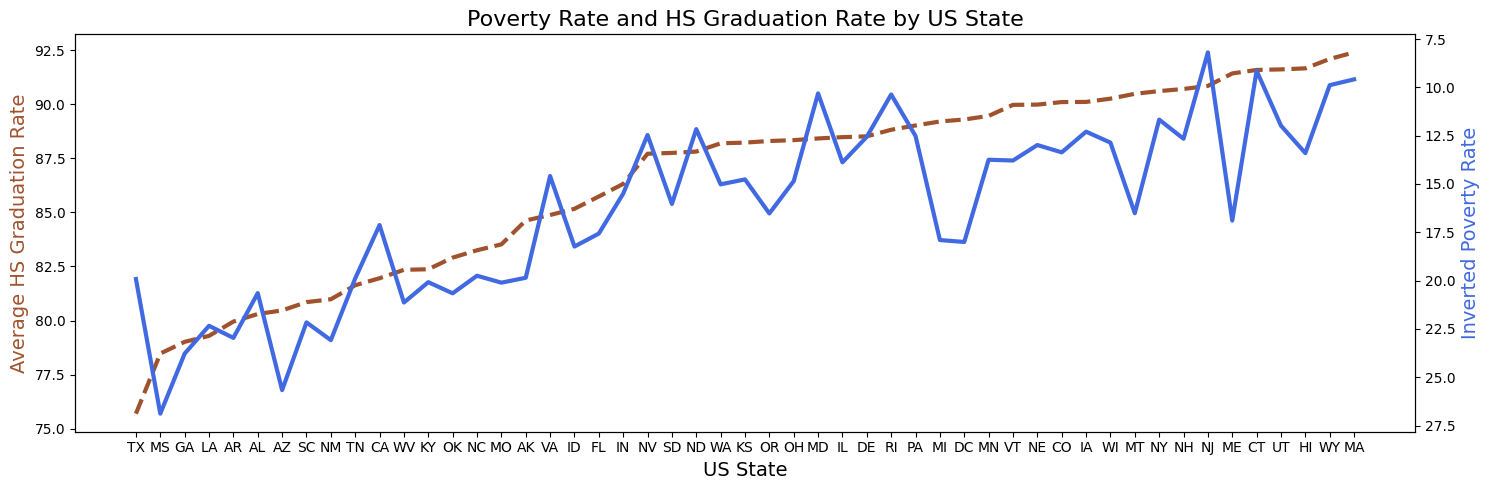

In [29]:
# Plotting a line graph to show the relation between Poverty Rate and HS Graduation Rate
fig = plt.figure(figsize=(15, 5))

plt.title('Poverty Rate and HS Graduation Rate by US State', fontsize=16)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.plot(hs_poverty_state['Geographic Area'],
         hs_poverty_state['Average High School Graduation Rate'],
         lw=3,
         color='sienna',
         linestyle='--'
         )

ax2.plot(hs_poverty_state['Geographic Area'],
         hs_poverty_state['Mean Poverty Rate'],
         lw=3,
         color='royalblue')


ax1.set_ylabel('Average HS Graduation Rate', fontsize=14, color='sienna')
ax1.set_xlabel('US State', fontsize=14)
ax2.set_ylabel('Inverted Poverty Rate', fontsize=14, color='royalblue')

# ax1.set_ylim(hs_poverty_state['Average High School Graduation Rate'].min(), hs_poverty_state['Average High School Graduation Rate'].max() + 5)
# ax2.set_ylim(hs_poverty_state['Mean Poverty Rate'].min(), hs_poverty_state['Mean Poverty Rate'].max() + 5)

ax2.invert_yaxis()

fig.tight_layout()

plt.show()

The correlation between high school graduation rates and poverty rates among U.S. states is now evident. As graduation rates increase, poverty rates tend to decrease (or increase correspondingly if the axis is inverted), reflecting a strong inverse relationship between the two variables. This is expected, as higher-paying jobs typically require higher levels of education, making education a key factor in reducing poverty

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

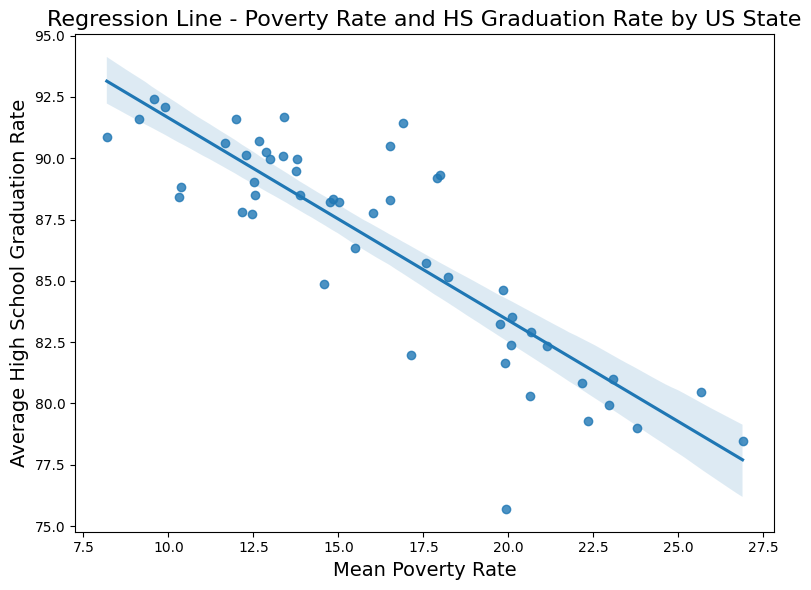

In [30]:
fig = plt.figure(figsize=(8, 6))

plt.title('Regression Line - Poverty Rate and HS Graduation Rate by US State', fontsize=16)

ax = sns.regplot(data=hs_poverty_state,
            x='Mean Poverty Rate',
            y='Average High School Graduation Rate')

ax.set_ylabel('Average High School Graduation Rate', fontsize=14)
ax.set_xlabel('Mean Poverty Rate', fontsize=14)


fig.tight_layout()

plt.show()

With the help of a Regression Line, we can prove the inverted relation between the two variables.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [31]:
# Creating one column with the total sum of the races pct
df_share_race_city_clean['total_race_share'] = df_share_race_city_clean[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].sum(axis=1)

# Excluding the column 'City' and grouping by State
share_race = df_share_race_city_clean.drop(['City'], axis=1).groupby('Geographic Area').sum().reset_index()

# Calculating the percentage for each race group
share_race['pct_white'] = (share_race['share_white'] / share_race['total_race_share']) * 100
share_race['pct_black'] = (share_race['share_black'] / share_race['total_race_share']) * 100
share_race['pct_native_american'] = (share_race['share_native_american'] / share_race['total_race_share']) * 100
share_race['pct_asian'] = (share_race['share_asian'] / share_race['total_race_share']) * 100
share_race['pct_hispanic'] = (share_race['share_hispanic'] / share_race['total_race_share']) * 100

# Creating a total sum of the percentages
share_race['total_race_pct'] = share_race[['pct_white', 'pct_black', 'pct_native_american', 'pct_asian', 'pct_hispanic']].sum(axis=1)

share_race.drop(['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic', 'total_race_share'], axis=1, inplace=True)

# Checking the result
share_race.head()

,Geographic Area,pct_white,pct_black,pct_native_american,pct_asian,pct_hispanic,total_race_pct
0,AK,47.74,0.59,47.97,1.45,2.25,100.00
1,AL,72.54,23.33,0.66,0.48,2.98,100.00
2,AR,78.25,16.26,0.76,0.48,4.26,100.00
3,AZ,54.31,0.87,25.91,0.66,18.26,100.00
4,CA,64.45,2.41,1.55,4.99,26.59,100.00


In [32]:
# Use pd.melt() to unpivot the DataFrame
share_race_melted = pd.melt(share_race,
                         id_vars=['Geographic Area', 'total_race_pct'],  # Keep this column as is
                         value_vars=['pct_white', 'pct_black', 'pct_native_american', 'pct_asian', 'pct_hispanic'],  # Columns to unpivot
                         var_name='Race',  # New column for race types
                         value_name='Percentage')  # New column for percentage values

# Display the transformed DataFrame
share_race_melted.loc[share_race_melted['Geographic Area'] == 'AK']

,Geographic Area,total_race_pct,Race,Percentage
0,AK,100.00,pct_white,47.74
51,AK,100.00,pct_black,0.59
102,AK,100.00,pct_native_american,47.97
153,AK,100.00,pct_asian,1.45
204,AK,100.00,pct_hispanic,2.25


In [33]:
# Create the bar plot
share_pct_bar = px.bar(share_race_melted,  # Provide the entire DataFrame
                       x='Geographic Area',  # Set x-axis as 'Percentage'
                       y='Percentage',  # Set y-axis as 'Geographic Area'
                       color='Race',  # Set color based on 'Race'
                       title='Race Distribution (%) by US State',
                       color_discrete_sequence=px.colors.qualitative.Pastel,
                       orientation='v'
)

# Update layout for axis titles
share_pct_bar.update_layout(xaxis_title='Race Distribution %',
                            yaxis_title='US State')

# Display the plot
share_pct_bar.show()

The racial composition of the US shows clear geographical trends. Most states have a white majority, with over 60% in many regions. In the South, the presence of Black and Hispanic populations increases, reflecting historical migration and demographic shifts. States like Mississippi, Georgia, and Louisiana have higher percentages of Black residents, often exceeding 30%. Similarly, states like Texas, California, and New Mexico show significant Hispanic populations, with many counties where Hispanics are the majority.

Hawaii is unique due to its significant Asian population, a result of historical immigration from Asian countries. This trend started in the late 19th century, with laborers coming to work on sugar plantations, and continues today with a diverse mix of Asian communities.

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [34]:
fatalities_race = df_fatalities_clean['race'].value_counts().reset_index()

fatalities_race['race'] = fatalities_race['race'].map({
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other',
    'Not Informed': 'Not Informed'
})

fatalities_race

,race,count
0,White,1201
1,Black,618
2,Hispanic,423
3,Not Informed,195
4,Asian,39
5,Native American,31
6,Other,28


In [35]:
fatalities_race_pie = px.pie(
    fatalities_race,
    values=fatalities_race['count'],
    names=fatalities_race['race'],
    hole=0.4
)

fatalities_race_pie.update_layout(
    title="Distribution of the Number of Deaths by Police per Race",  # Add a title to the pie chart
    title_x=0.5,  # Center the title
    legend_title="Race",  # Customize the legend title
    legend=dict(
        orientation="v",  # Change the legend orientation ('v' for vertical, 'h' for horizontal)
        x=0.7,  # Position the legend on the x-axis
        y=1,  # Position the legend on the y-axis
        font=dict(
            family="Calibri",  # Set the font family for the legend
            size=18,  # Set the font size for the legend
            color="black"  # Set the font color for the legend
        ),
    )
    )

fatalities_race_pie.update_traces(
    textfont_size=14  # Increase the font size for values inside the pie chart
)

fatalities_race_pie.show()

In general, most police fatalities involve white individuals (47%), followed by Black (24%) and Hispanic (16.7%) individuals. However, the percentage of Black and Hispanic people among these fatalities is disproportionately high compared to their representation in the US population. This suggests these populations are more likely to be victims of police violence.

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [36]:
fatalities_gender = df_fatalities_clean['gender'].value_counts()

fatalities_gender

,count
gender,
M,2428
F,107


<ipython-input-37-736bac56b774>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




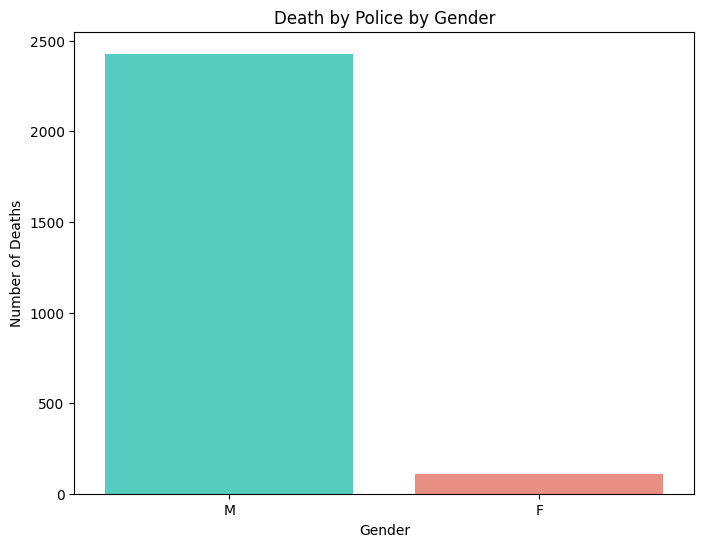

In [37]:
fig = plt.figure(figsize=(8, 6))

plt.title('Death by Police by Gender')

ax = sns.barplot(x=fatalities_gender.index,
            y=fatalities_gender.values,
            palette=['turquoise', 'salmon'])

ax.set_ylabel('Number of Deaths')
ax.set_xlabel('Gender')

plt.show()

The number of men killed by police is drastically higher than women, with men being over 20 times more likely to be victims. This disparity highlights a significant gender-based discrepancy in police-related fatalities.

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [38]:
df_fatalities_clean

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,date_full
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015-02-01
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015-02-01
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015-03-01
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015-04-01
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,Not Informed,Kansas City,MO,False,attack,Not fleeing,False,2017-07-28
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,Not Informed,Albuquerque,NM,False,attack,Car,False,2017-07-28
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,Not Informed,Melba,ID,False,attack,Car,False,2017-07-29
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,2017-07-31


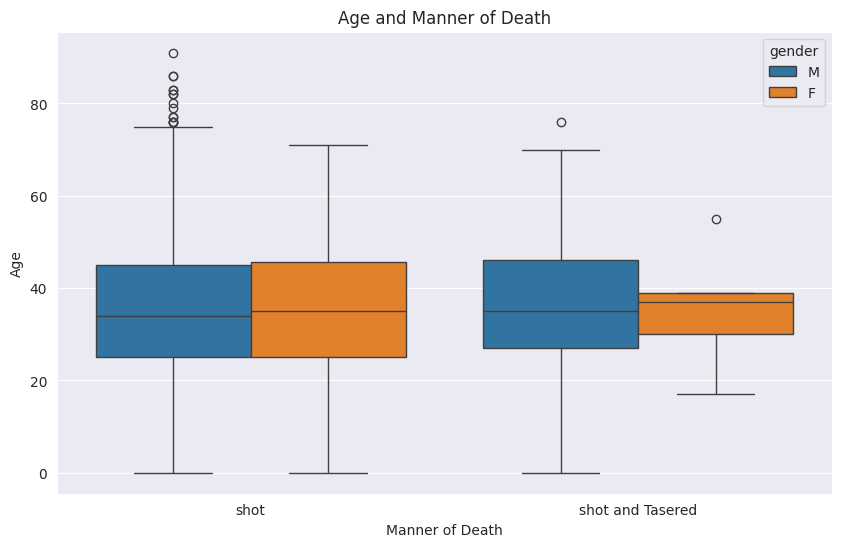

In [39]:
fig = plt.figure(figsize=(10, 6))

with sns.axes_style("darkgrid"):
  ax = sns.boxplot(x = 'manner_of_death',
            y = "age",
            data = df_fatalities_clean,
            hue='gender'
            )

  ax.set_title('Age and Manner of Death')
  ax.set_xlabel('Manner of Death')
  ax.set_ylabel('Age')

plt.show()

There are significant differences in police-related fatalities when broken down by gender and age. The age distribution for males spans a wider range with more outliers compared to females, which indicates that men from a advance age are more likely to be victim of police violence than women. Both genders experience police fatalities primarily through shootings, but the data suggests variations in the exact nature and circumstances of these encounters.


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [40]:
df_fatalities_clean['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [41]:
arm_pct = df_fatalities_clean.groupby('armed').size().reset_index(name='total')

arm_total = arm_pct['total'].sum()

arm_pct['percentage'] = arm_pct['total'] / arm_total

arm_pct.sort_values('percentage', ascending=False)

,armed,total,percentage
25,gun,1398,0.55
32,knife,373,0.15
67,vehicle,177,0.07
64,unarmed,171,0.07
65,undetermined,117,0.05
...,...,...,...
7,bayonet,1,0.00
29,hand torch,1,0.00
37,metal hand tool,1,0.00
35,machete and gun,1,0.00


In [42]:
fig = plt.figure(figsize=(10, 6))

arm_pie = px.pie(arm_pct.loc[arm_pct['percentage'] > 0.01],
            values = 'percentage',
            names='armed',
            color='armed',
            color_discrete_sequence=px.colors.qualitative.Pastel
            )

arm_pie.update_layout(title='Deaths by Police by Victim Armed Status',
                      title_x=0.5,
                      legend_title='Victim Armament')

arm_pie.update_traces(
    textfont_size=14
)

arm_pie.show()

<Figure size 1000x600 with 0 Axes>

7.3% of the victims were unarmed at the time of their deaths, which is a significant number. When we include victims who did not possess a gun (unarmed, toy weapon, or vehicle), the total rises to a staggering 27.65%. This indicates a high incidence of police lethality against unarmed citizens.

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [43]:
pct_25 = round(len(df_fatalities_clean.loc[df_fatalities_clean['age'] < 25]) / len(df_fatalities_clean) * 100, 2)
print(f'From the total deaths by the police, {pct_25}% were of people under 25 years age!')



From the total deaths by the police, 20.79% were of people under 25 years age!


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

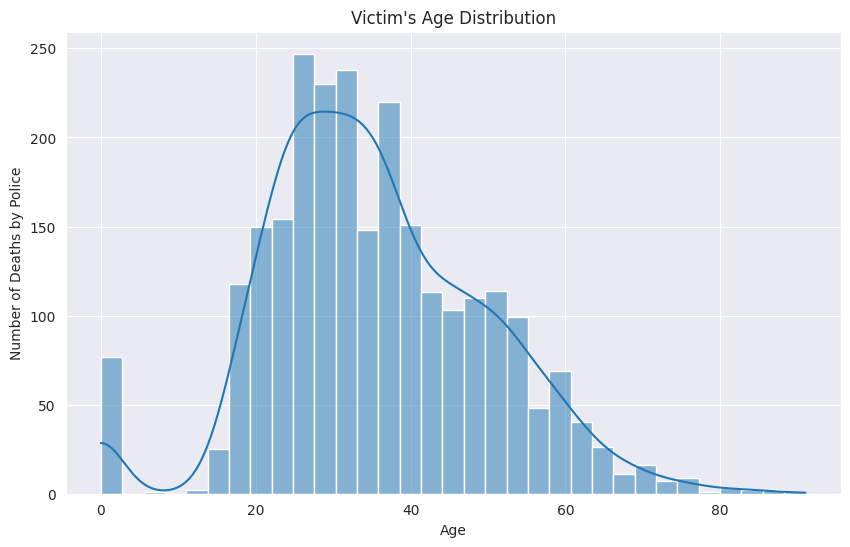

In [44]:
fig = plt.figure(figsize=(10, 6))

with sns.axes_style("darkgrid"):
  ax = sns.histplot(x = 'age',
                    data = df_fatalities_clean,
                    kde=True
            )

  ax.set_title('Victim\'s Age Distribution')
  ax.set_xlabel('Age')
  ax.set_ylabel('Number of Deaths by Police')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [45]:
# creating a dictionary with the name for each race code and replacing it to better visualization
race_dict = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other',
    'Not Informed': 'Not Informed'}

df_fatalities_clean['race'] = df_fatalities_clean['race'].replace(race_dict)

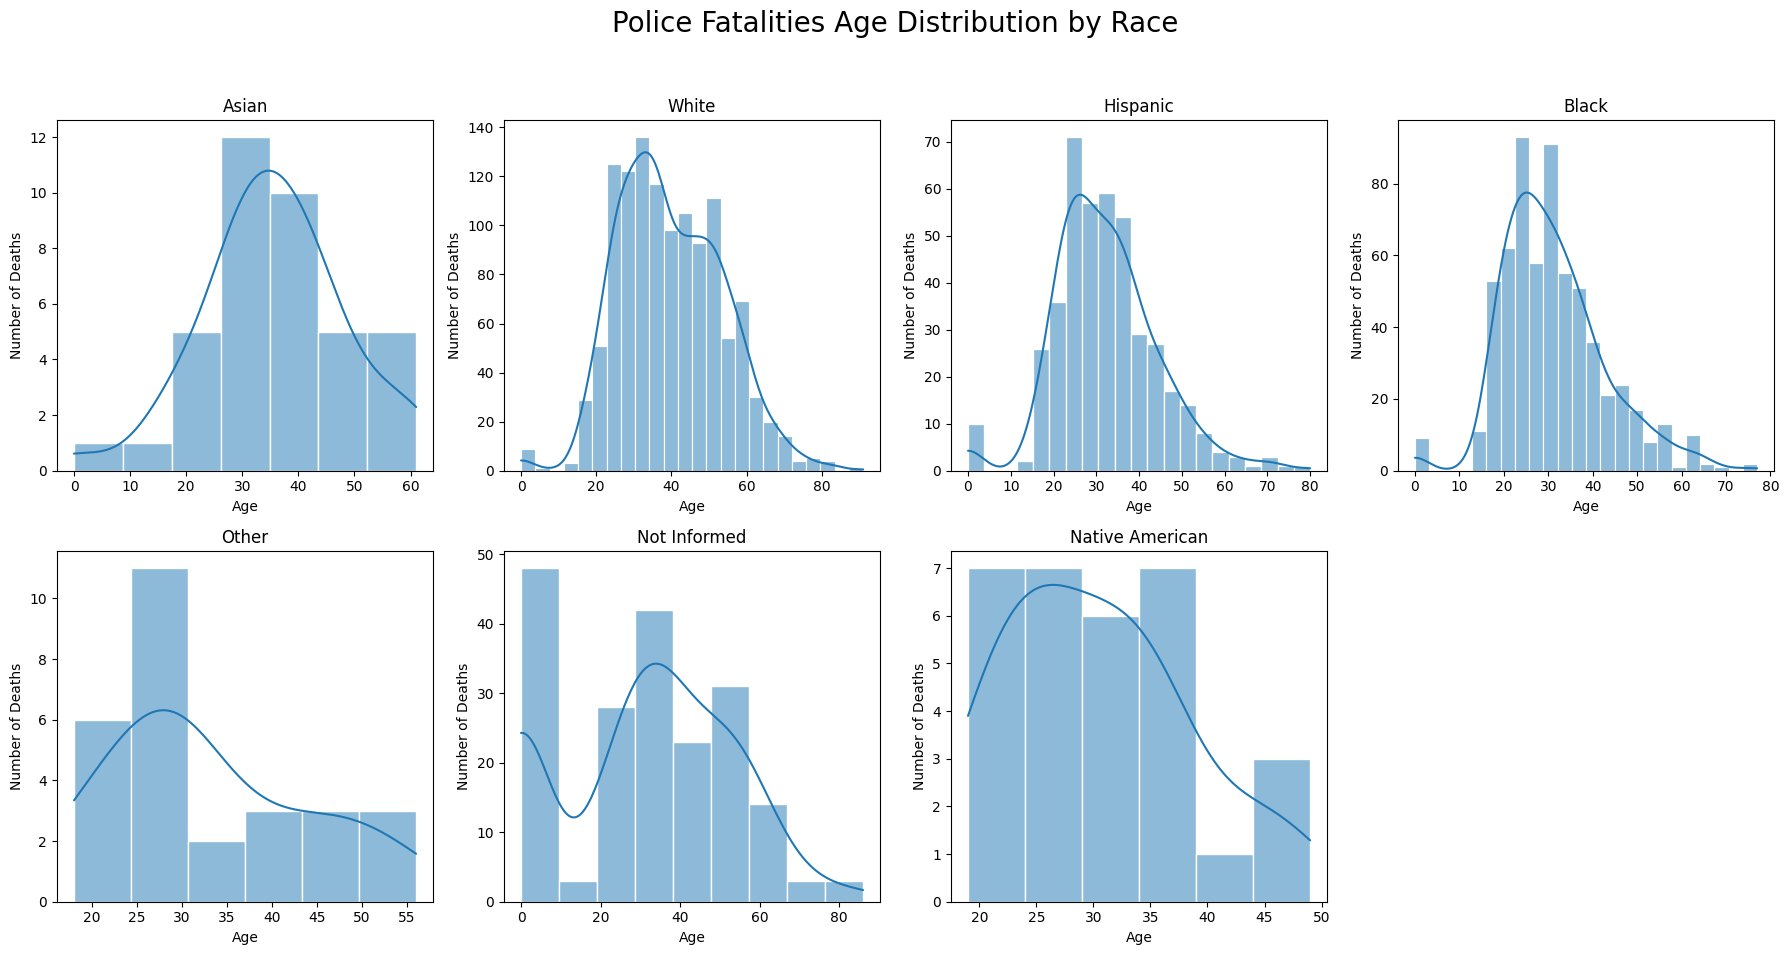

In [46]:
# List of unique races
races_list = df_fatalities_clean['race'].unique().tolist()

# Create subplots
fig, ax = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Police Fatalities Age Distribution by Race', fontsize=20)
ax = ax.flatten()

# Apply seaborn darkgrid style
with sns.axes_style("darkgrid"):
    for i, col in enumerate(races_list):
        sns.histplot(
            x='age',
            data=df_fatalities_clean[df_fatalities_clean['race'] == col],
            kde=True,
            ax=ax[i]
        )
        ax[i].set_title(col)
        ax[i].set_xlabel('Age')
        ax[i].set_ylabel('Number of Deaths')

# Hides the last empty ax
fig.delaxes(ax[-1])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

While the age of most White victims varies between 25 and 55 years, Hispanic, Asian, and Black victims are predominantly younger, typically under 40 years old. Native American victims are even younger, with ages primarily under 35 years. This suggests that younger individuals from non-White racial groups are more frequently targeted in police fatalities.

The data also shows a wider age range for White victims, suggesting less age discrimination within this group. Conversely, non-White victims, particularly Native Americans, skew younger, reinforcing the notion that younger individuals from these groups are at higher risk. The presence of older White victims might indicate systemic bias, where non-White individuals encounter police under more severe circumstances earlier in life. This disparity hints at broader societal and structural inequalities at play

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [47]:
fatalities_race = df_fatalities_clean.groupby('race').size().sort_values(ascending=False).reset_index(name='total')

fig = px.bar(fatalities_race,
             x='race',
             y='total',
             color='total',
             color_continuous_scale='Aggrnyl',
             labels={'y': 'Number of Deaths', 'x': 'Race'})

# Hide the color axis (color bar)
fig.update_layout(xaxis_title='Total Number of Deaths',
                  yaxis_title='Race',
                  title='Number of Deaths by Police by Race',  # Add a title to the pie chart
                  title_x=0.5,
                  legend_title='Number of Deaths')

fig.show()

After White people, Black and Hispanic populations are the most targeted by police. The number of deaths in these two groups is disproportionately high compared to their representation in the population, indicating that these racial groups are more frequently subjected to lethal police actions.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [48]:
df_fatalities_clean['signs_of_mental_illness'].value_counts(normalize=True)

,proportion
signs_of_mental_illness,
False,0.75
True,0.25


A staggering amount of 25% of the police violence victims were suffering from some type of mental illness. The high lethality against these individuals shows a lack of prepartion to deal with civilians that required special medical attention, as well as particular strategies and approaches from the police force

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [49]:
# Finding the 10 cities with the highest number of deaths
top_10_cities = df_fatalities_clean.groupby('city').size().reset_index(name='total').sort_values(by='total', ascending=False)[0:10]

# Cjecking result
top_10_cities

,city,total
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
1118,San Antonio,20
284,Columbus,19
808,Miami,18
60,Austin,18
1217,St. Louis,15


In [50]:
# Create the bar plot
top_10_cities_bar = px.bar(top_10_cities[::-1],
                                x='total',
                                y='city',
                                orientation='h',
                                color='total',
                                color_continuous_scale='magenta')

top_10_cities_bar.update_layout(xaxis_title='Total Number of Deaths',
                  yaxis_title='City',
                  title='Top 10 Cities by Police Fatalities',
                  title_x=0.5,
                  coloraxis_colorbar=dict(title='Number of Deaths'),
                  showlegend=False)

# Display the plot
top_10_cities_bar.show()

Los Angeles leads the chart with the highest number of deaths, reaching approximately 40 fatalities. Phoenix and Houston follow, with roughly 35 and 30 deaths, respectively. Other cities such as Chicago, Las Vegas, and San Antonio show a decreasing trend, with around 20-25 deaths.
St. Louis ranks the lowest among the top 10 cities, with about 15 deaths.

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

After exploring the dataset containing the police fatalities, a difference in the city names with the dataset containig the proportion of race was found: while in the fatalities df the cities names are alone (e.g. Los Angeles), in the races df they are followed by the 'city' word (e.g. Los Andeles city). To be able to use information form both and compare the number of deaths with the proportion of different races per city, its necessary to standardize the names.

In [51]:
# Removing ' city' from the city names in the fatalities dataset
df_share_race_city_clean['City'] = df_share_race_city_clean['City'].str.replace(' city', '')

# Checking the results
df_share_race_city_clean.loc[df_share_race_city_clean['City'] == 'Los Angeles']

,Geographic Area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,total_race_share
2714,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50,119.90


In [52]:
# Getting hold of the top_10 city names
top_10_cities_list = top_10_cities['city'].tolist()

In [53]:
# Creating one column with the total sum of the races pct
df_share_race_city_clean['total_race_share'] = df_share_race_city_clean[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].sum(axis=1)

# Excluding the column 'City' and grouping by State
share_race_city = df_share_race_city_clean.drop(['Geographic Area'], axis=1).groupby('City').sum().reset_index()

# Calculating the percentage for each race group
share_race_city['pct_white'] = (share_race_city['share_white'] / share_race_city['total_race_share']) * 100
share_race_city['pct_black'] = (share_race_city['share_black'] / share_race_city['total_race_share']) * 100
share_race_city['pct_native_american'] = (share_race_city['share_native_american'] / share_race_city['total_race_share']) * 100
share_race_city['pct_asian'] = (share_race_city['share_asian'] / share_race_city['total_race_share']) * 100
share_race_city['pct_hispanic'] = (share_race_city['share_hispanic'] / share_race_city['total_race_share']) * 100

# Creating a total sum of the percentages
share_race_city['total_race_pct'] = share_race_city[['pct_white', 'pct_black', 'pct_native_american', 'pct_asian', 'pct_hispanic']].sum(axis=1)

share_race_city.drop(['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic', 'total_race_share'], axis=1, inplace=True)

# Checking the result
share_race_city = share_race_city.loc[share_race_city['City'].isin(top_10_cities_list)]

In [54]:
# Using pd.melt() to unpivot the DataFrame
share_race_city_melted = pd.melt(share_race_city,
                         id_vars='City',
                         value_vars=['pct_white', 'pct_black', 'pct_native_american', 'pct_asian', 'pct_hispanic'],
                         var_name='Race',
                         value_name='Percentage')

# Filtering by the white pct
share_white = share_race_city_melted.loc[share_race_city_melted['Race'] == 'pct_white']
share_white.rename(columns={'City': 'city', 'Percentage': 'White People Pct'}, inplace=True)

merged_top_cities = top_10_cities.merge(share_white, on='city', how='inner')

merged_top_cities

<ipython-input-54-5d05003f48d5>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,city,total,Race,White People Pct
0,Los Angeles,39,pct_white,41.53
1,Phoenix,31,pct_white,67.49
2,Houston,27,pct_white,73.40
3,Chicago,25,pct_white,39.89
4,Las Vegas,21,pct_white,48.51
5,San Antonio,20,pct_white,67.61
6,Columbus,19,pct_white,75.77
7,Miami,18,pct_white,72.68
8,Austin,18,pct_white,80.97
9,St. Louis,15,pct_white,54.95


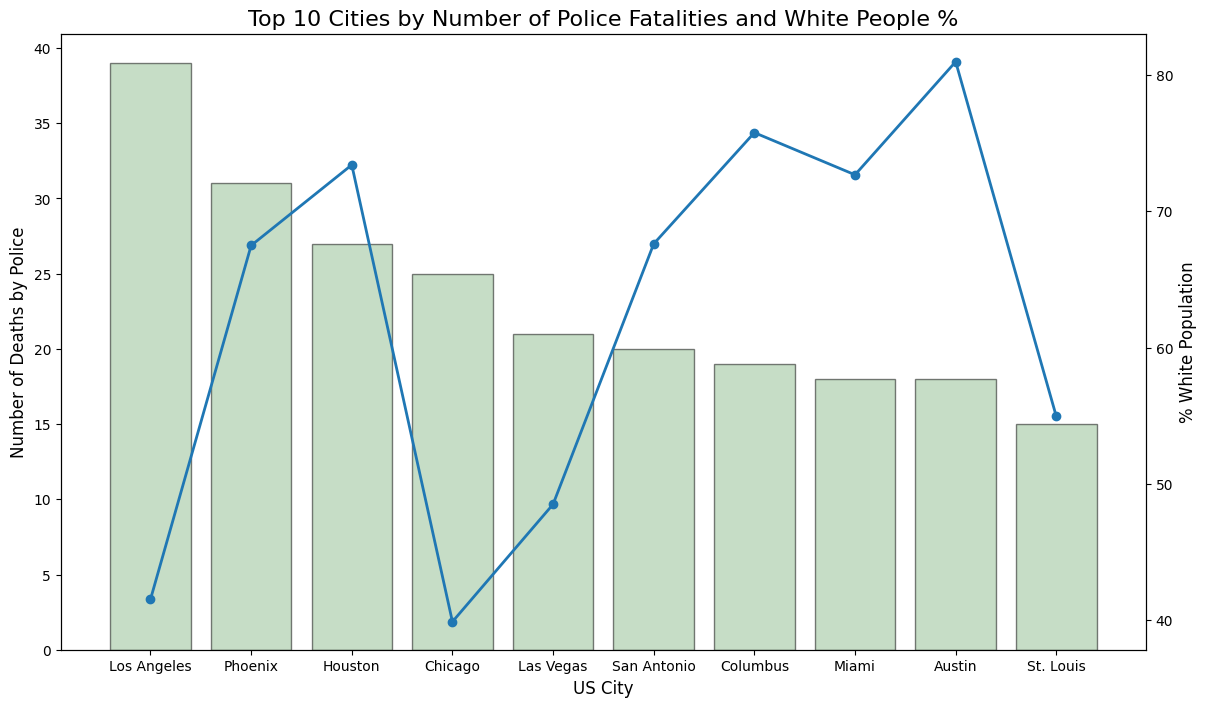

In [55]:
fig = plt.figure(figsize=(14, 8))

plt.title('Top 10 Cities by Number of Police Fatalities and White People %', fontsize=16)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.bar(x=merged_top_cities['city'],
        height=merged_top_cities['total'],
        color = "darkseagreen",
        alpha = 0.50,
        edgecolor='black'
        )

ax2.plot(merged_top_cities['city'],
         merged_top_cities['White People Pct'],
         linewidth=2,
         marker='o'
         )

ax1.set_ylabel('Number of Deaths by Police', fontsize=12)
ax2.set_ylabel('% White Population', fontsize=12)
ax1.set_xlabel('US City', fontsize=12)

plt.show()

Analyzing the proportion of the white population in the 10 cities with the highest number of police-related deaths does not provide strong evidence of a correlation between the presence of non-white populations and police violence, at least within this specific group of cities. While cities like Los Angeles and Chicago have both a low proportion of white residents and a high number of deaths, cities like Phoenix and Houston present the opposite pattern, with a higher proportion of white residents but still significant numbers of fatalities.

This suggests that racial demographics alone, although they provide some insights into the levels of police violence, are insufficient to fully explain the variations in police-related deaths across these cities. Other factors, such as economic conditions, overall population size, and local law enforcement policies, may also play a significant role in determining the number of fatalities.

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [56]:
kill_state = df_fatalities_clean.groupby('state').size().reset_index(name='Number of Deaths').sort_values(by='Number of Deaths', ascending=False)

In [57]:
kill_state_map = px.choropleth(
    kill_state,
    locations='state',
    locationmode='USA-states',
    color='Number of Deaths',
    color_continuous_scale='reds',
    scope='usa',
    title='Police Fatalities by State'
)

kill_state_map.update_layout(
    title_x=0.5,
    title=dict(font=dict(size=20)),
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    height=600,
    width=1000
)

kill_state_map.show()

In [58]:
# Filtering the 10 most violent states by their poverty rate
kill_state[:10].loc[kill_state['state'].isin(poverty_rate_state[-20:]['Geographic Area'])]

,state,Number of Deaths
43,TX,225
9,FL,154
3,AZ,118
36,OK,78
10,GA,70
27,NC,69
24,MO,64


When combining the data on police violence with poverty rates across U.S. states, we observe that 7 out of the 10 most violent states in terms of police fatalities are also among the top 20 states with the highest poverty rates. This suggests a potential positive correlation between the prevalence of police fatalities and the poverty rate in these states.

Although this correlation does not imply causation, it underscores the significance of economic and social conditions in shaping the dynamics of police interactions. The heightened levels of poverty may exacerbate social stressors, leading to more frequent and violent encounters with law enforcement in these areas.

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [59]:
df_fatalities_clean['month'] = df_fatalities_clean['date_full'].dt.to_period('M').dt.to_timestamp()

kill_trends = df_fatalities_clean.groupby('month').size().reset_index(name='total')

kill_trends.head()

,month,total
0,2015-01-01,70
1,2015-02-01,78
2,2015-03-01,87
3,2015-04-01,88
4,2015-05-01,85


In [75]:
import matplotlib.dates as mdates

years = mdates.YearLocator(1)  # Major ticks every year
months = mdates.MonthLocator()  # Minor ticks every 6 months
months_fmt = mdates.DateFormatter('%b')  # Format minor ticks to show month and year

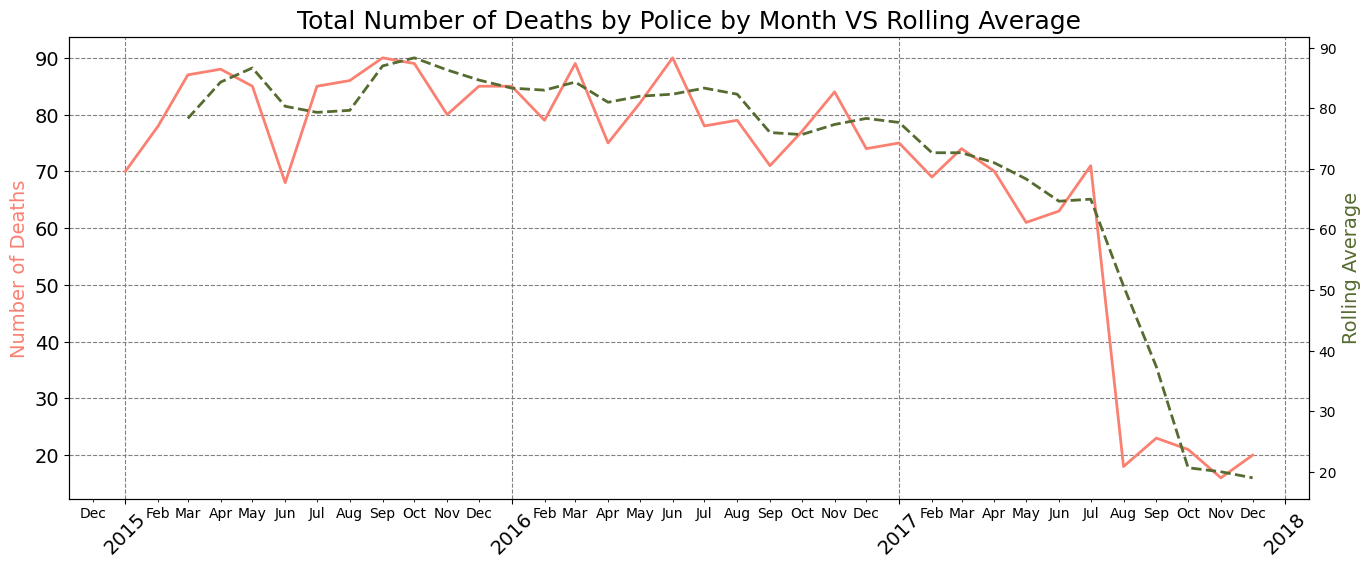

In [84]:
roll_kill_trends = kill_trends['total'].rolling(window=3).mean()

# Adjusting the size of the graph, resol, x and y ticks
plt.figure(figsize=(16,6), dpi=100)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Title
plt.title('Total Number of Deaths by Police by Month VS Rolling Average', fontsize=18, color='black')

# Creating two axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# Setting labels and colors
ax1.set_ylabel('Number of Deaths', color = 'salmon', fontsize=14)
ax2.set_ylabel('Rolling Average', color = 'darkolivegreen', fontsize=14)

# Setting the locator for x-axis
ax1.xaxis.set_major_locator(years)  # Major ticks by year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Major tick formatting
ax1.xaxis.set_minor_locator(months)  # Minor ticks every 6 months
ax1.xaxis.set_minor_formatter(months_fmt)  # Minor tick formatting

# Rotate minor ticks for months
for label in ax1.xaxis.get_minorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax1.grid(color='grey', linestyle='--') # Adding a grid
ax1.set_axisbelow(True)

# Plotting both axis
ax1.plot(kill_trends['month'], kill_trends['total'],
         color = 'salmon', lw='2')
ax2.plot(kill_trends['month'], roll_kill_trends.values,
         color = 'darkolivegreen', linewidth=2,  linestyle='--')

plt.show()

From January 2015 to September 2015, the number of deaths caused by police actions showed a rising trend. However, from October 2015 to July 2017, this trend began to reverse, showing a gradual but steady decline. In July 2017, a significant event occurred, leading to a sharp drop in deaths from 70 to 20, a level that remained stable for the rest of the period analyzed.

This shift suggests a notable change in police behavior, possibly driven by an external factor that resulted in a substantial and lasting decrease in police-related deaths.

# Conclusion



The data suggests that police fatalities are not random events; rather, they are closely tied to economic, gender, educational, and racial factors. The proportion of non-white individuals killed by police is significantly higher than their representation in the U.S. population, with Black individuals being the most affected group. Additionally, men are disproportionately affected compared to women, and most fatalities occur among young adults between the ages of 20 and 40.

When examining the ten most dangerous cities, a clear correlation emerges between poverty rates and police violence. Interestingly, the number of police-related deaths is inversely proportional to poverty rates, suggesting that communities with lower poverty rates may experience more police-related fatalities. The relationship between high school graduation rates and poverty is also apparent, indicating that states with higher graduation rates tend to have lower poverty levels. This insight highlights the potential impact of educational attainment on reducing poverty across states.

